
---

# ADL HW3 - Pretrained Models

In this assignment, you will analyze and compare a few pre-trained models from the field of computer vision.

The assignment is divided into several tasks:

- **EX1 - The Imagenette Dataset (10 pts)**  
- **EX2 - Pretrained Models (20 pts)**  
- **EX3 - Visualizing Feature Maps (30 pts)**  
- **EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50 pts)**  

Note: In this assignment, you will not train any models or aim to reach specific accuracy levels. Instead, you will investigate the behavior of a few pre-trained models.

---

## Grading

The grading for each section is indicated in the title. Grading will be based on the following criteria:

- **Following Instructions**  
- **Presentation**: Clear figures (with labels, titles, etc.), well-written discussions and comments, organized notebook, no leftover debugging prints, and no redundant functions.  
- **Clear and Efficient Code**: Your code should be clear and neat. Write clear comments and avoid `for loops` when vectorized operations are available. Use the GPU when possible.  
- **Discussion**: Ensure you write a discussion whenever it is required.  

---

## Submission Date: **31.01.2025**

Submit the fully executed notebook.

---


# EX1 - Imagenette Dataset (10pts)



1.   Download the ```Imagenette``` dataset from ```torchvision``` ([link](https://pytorch.org/vision/0.19/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette)). Make sure the set size="160px" to avoid long downloading time.
2. Preprocess the data - resize to 256x256 and take a central crop of size 224. ToTensor, Normalize and so on.
3. Describe the dataset: number of samples for each set, classes labels, classes labels distribtuion (are they balanced?)

4. Plot 5 random samples from each class a present them in a ```num_classes X 5``` (rows X columns) grid.






In [1]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_train = datasets.Imagenette(root='imagenette_data_Train', split='train', size="160px", download=True, transform=transform)
dataset_test = datasets.Imagenette(root='imagenette_data_Test', split='val', size="160px", download=True, transform=transform)

100%|██████████| 99.0M/99.0M [00:02<00:00, 40.4MB/s]


Extracting imagenette_data_Train/imagenette2-160.tgz to imagenette_data_Train


100%|██████████| 99.0M/99.0M [00:02<00:00, 40.4MB/s]


Extracting imagenette_data_Test/imagenette2-160.tgz to imagenette_data_Test


In [2]:
from collections import Counter

class_counts = Counter([dataset_train.classes[label] for _, label in dataset_train])
print("Number of samples per class (train set):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

is_balanced = len(set(class_counts.values())) == 1
print(f"\nAre classes balanced? {'Yes' if is_balanced else 'No'}")

class_counts = Counter([dataset_test.classes[label] for _, label in dataset_test])
print("\nNumber of samples per class (test set):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

is_balanced = len(set(class_counts.values())) == 1
print(f"\nAre classes balanced? {'Yes' if is_balanced else 'No'}")

Number of samples per class (train set):
('tench', 'Tinca tinca'): 963
('English springer', 'English springer spaniel'): 955
('cassette player',): 993
('chain saw', 'chainsaw'): 858
('church', 'church building'): 941
('French horn', 'horn'): 956
('garbage truck', 'dustcart'): 961
('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'): 931
('golf ball',): 951
('parachute', 'chute'): 960

Are classes balanced? No

Number of samples per class (test set):
('tench', 'Tinca tinca'): 387
('English springer', 'English springer spaniel'): 395
('cassette player',): 357
('chain saw', 'chainsaw'): 386
('church', 'church building'): 409
('French horn', 'horn'): 394
('garbage truck', 'dustcart'): 389
('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'): 419
('golf ball',): 399
('parachute', 'chute'): 390

Are classes balanced? No


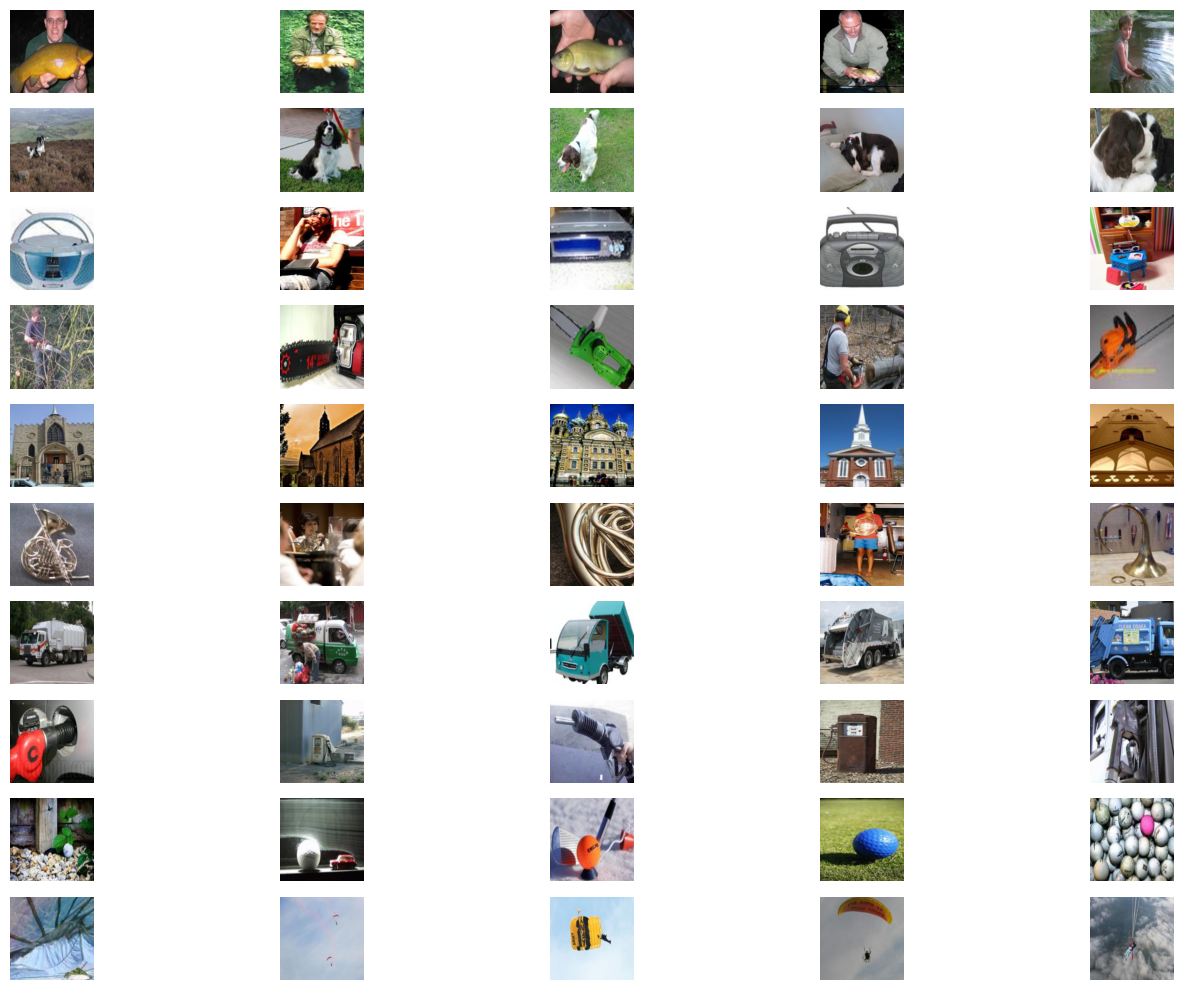

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_samples(dataset, num_samples=5):

    num_classes = len(dataset.classes)
    fig, axs = plt.subplots(num_classes, num_samples, figsize=(15, 10))

    for class_idx, class_name in enumerate(dataset.classes):

        class_indices = [i for i, (_, label) in enumerate(dataset) if label == class_idx]
        selected_indices = random.sample(class_indices, num_samples)

        for i, idx in enumerate(selected_indices):

            img, _ = dataset[idx]
            img = img.permute(1, 2, 0).numpy()
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img = np.clip(img, 0, 1)

            axs[class_idx, i].imshow(img)
            axs[class_idx, i].axis('off')

    plt.tight_layout()
    plt.show()

plot_samples(dataset_train)

# EX2 - Pretrained models (20pts)

1. Choose 2 models from ```torchvision.models``` ([link](https://pytorch.org/vision/stable/models.html)) that were pretrained on ImageNet. The third model is one of ResNet18/34/50 (the other models can't other ResNet variation).
2. Use ```torch-summary``` to summarize each model for an input of shape ```1x3x224x224```.
3. Describe each model in 2-4 lines. Think carefully what information might be relevant for this homework assignment (see EX3-EX4). It is recommended to read the paper in which each model was first presented but it is not required. You are, however, required to go over model's description in torchvision documentation (see the information tab for ResNet18 for an example [link](https://pytorch.org/vision/0.19/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18) )
4. Summarize the similarities and difference between the 3 models.

In [126]:
import torchvision.models as models
from torchsummary import summary

input_shape = (3, 224, 224)

alexnet = models.alexnet(pretrained=True)
efficientnet_b0 = models.efficientnet_b0(pretrained=True)
resnet18 = models.resnet18(pretrained=True)

print("AlexNet Summary:")
summary(alexnet, input_shape)
print("\nEfficientNet Summary:")
summary(efficientnet_b0, input_shape)
print("\nResNet Summary:")
summary(resnet18, input_shape)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-

AlexNet Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14  

In [ ]:
"""
AlexNet is a deep neural network architecture designed for image classification tasks.
It consists of 8 layers: 5 convolutional layers (which detect features like edges, textures, etc.)
followed by 3 fully connected layers.
The network uses ReLU activation, pooling layers,
and dropout for regularization to improve performance and reduce overfitting.

EfficientNet is designed to be efficient by carefully balancing three factors:
the number of layers, the number of filters in each layer, and the size of the input images.
Instead of just making the network deeper or wider, it scales all three in a balanced way.
It uses special types of convolutions and activations (like MBConv and swish)
to make the model both accurate and fast, while using fewer resources compared to other models.

ResNet is an architecture designed to make deep neural networks easier to train.
It introduces residual connections,
which are shortcuts that skip one or more layers and directly pass the input to later layers.
This helps solve the problem of vanishing gradients in very deep networks.
The key idea is that instead of learning the full output,
the network learns the "residual" or difference between the input and output,
making it easier for the network to learn complex features without degrading performance as it gets deeper.
"""

In [ ]:
"""
Similarities :
1. All three architectures rely on convolutional layers to extract features from images.
2. They use activation functions like ReLU (AlexNet and ResNet) or swish (EfficientNet)
   to introduce non-linearity.

Differences :
1. Architecture Design :
  a. AlexNet: Focuses on a relatively simple architecture with 5 convolutional layers followed
     by 3 fully connected layers.
  b. EfficientNet: Uses a compound scaling method to balance depth, width, and resolution,
     optimizing efficiency and accuracy with fewer parameters.
  c. ResNet: Introduces residual connections (skip connections) to solve the problem
     of vanishing gradients in deeper networks, allowing very deep networks to be trained effectively.
2. Performance :
  a. AlexNet: Achieved high accuracy for its time but is less efficient compared to newer models.
  b. EfficientNet: Achieves high accuracy with fewer parameters, making it more efficient
     than both AlexNet and ResNet.
  c. ResNet: Known for its ability to train very deep networks without degradation in performance,
     making it suitable for complex tasks.
"""

# EX3 - Visualizing feature maps (30pts)
In this section you will visualize the feature maps learned by your chosen models.


*   In a convoultion-based models (i.e., ResNet, ConvNext), use the final conv block. If the image resolution is too small do to maxpooling operations, you may choose a different block.
*   In a vision transformer (ViT), use model output without the cls token (if relevant).

Assignments:


1.   Describe the feature map shape for an input image of shape ```1x3x224x224``` (i.e., ```1x512xHxW``` for some model).
2. Choose 1 class from Imagenette and sample 10 random images.
3. Extract the feature maps from each model and perform PCA on the channel dim from 512 to 3. The output should be of size ```10x3xHxW```
4. Resize the features to 112x112 and plot the images for each model (3 row x 10 columns)
5. Summarize the similarities and difference between the 3 models according to the PCA for the features you have presented.





In [ ]:
"""
For an input image of shape 1x3x224x224
(where 1 is the batch size, 3 is the number of color channels, and 224x224 is
the height and width of the image),
the feature map shape will depend on the architecture and the operations applied to the image.

AlexNet : The final feature map shape before flattening for fully connected layers is 1x256x6x6
          (after applying the final convolution and pooling layers).
EfficientNet : After passing through all the blocks, the feature map size is 1x1280x7x7
               (final block output), just before the global average pooling layer.
ResNet : The feature map size is 1x512x7x7 after the last residual block in Stage 4.
"""

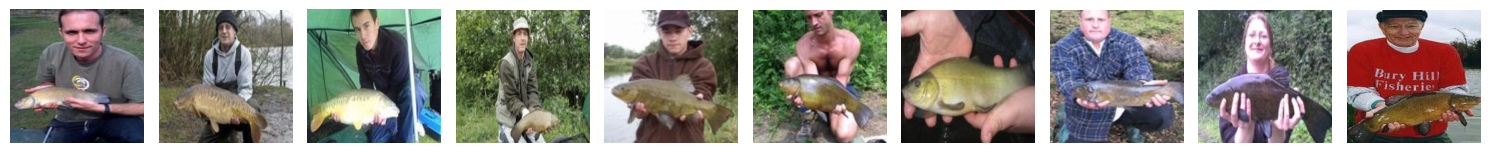

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

def sample_random_images(dataset, num_samples=10):

    class_idx = 0
    class_name = dataset.classes[class_idx]

    class_indices = [i for i, (_, label) in enumerate(dataset) if label == class_idx]
    selected_indices = random.sample(class_indices, num_samples)

    fig, axs = plt.subplots(1, num_samples, figsize=(15, 10))

    for i, idx in enumerate(selected_indices):

        img, _ = dataset[idx]
        img = img.permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

    return selected_indices;

ten_random_images = sample_random_images(dataset_train)

In [6]:
import torch
import torchvision.models as models
import torch.nn as nn

def extract_feature_maps(model, image):

    if isinstance(model, models.AlexNet):

        Conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=4, padding=2)
        output = Conv(image)

        ReLU = nn.ReLU()
        output = ReLU(output)

        MaxPool = nn.MaxPool2d(kernel_size=3, stride=2)
        output = MaxPool(output)

        Conv = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2)
        output = Conv(output)

        return output

    elif isinstance(model, models.EfficientNet):

        Conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=11, stride=2, padding=5)
        output = Conv(image)

        BatchNorm = nn.BatchNorm2d(32)
        output = BatchNorm(output)

        SiLU = nn.SiLU()
        output = SiLU(output)

        Conv = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=11, stride=1, padding=5)
        output = Conv(output)

        return output

    elif isinstance(model, models.ResNet):

        Conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=2, padding=5)
        output = Conv(image)

        BatchNorm = nn.BatchNorm2d(64)
        output = BatchNorm(output)

        ReLU = nn.ReLU()
        output = ReLU(output)

        MaxPool = nn.MaxPool2d(kernel_size=2, stride=2)
        output = MaxPool(output)

        Conv = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=11, stride=1, padding=5)
        output = Conv(output)

        return output

In [7]:
from sklearn.decomposition import PCA

def apply_pca(feature_map, n_components=3):

    # Convert to numpy
    feature_map = feature_map.cpu().detach().numpy()

    # Get the spatial dimensions (H, W) and number of channels (C)
    C, H, W = feature_map.shape

    # Reshape feature map for PCA: (C, H, W) -> (H*W, C)
    reshaped = feature_map.reshape(C, -1).T

    # Apply PCA to reduce channel dimensions
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(reshaped)  # Shape: (H*W, n_components)

    # Reshape PCA output back to spatial dimensions: (H*W, n_components) -> (n_components, H, W)
    pca_result = pca_result.T.reshape(n_components, H, W)

    return pca_result

In [8]:
import torch.nn.functional as F

def resize_feature_map(feature_map, size=(112, 112)):

    feature_map = torch.tensor(feature_map)
    resized_map = F.interpolate(feature_map.unsqueeze(0), size=size, mode='bilinear', align_corners=False).squeeze(0)
    return resized_map

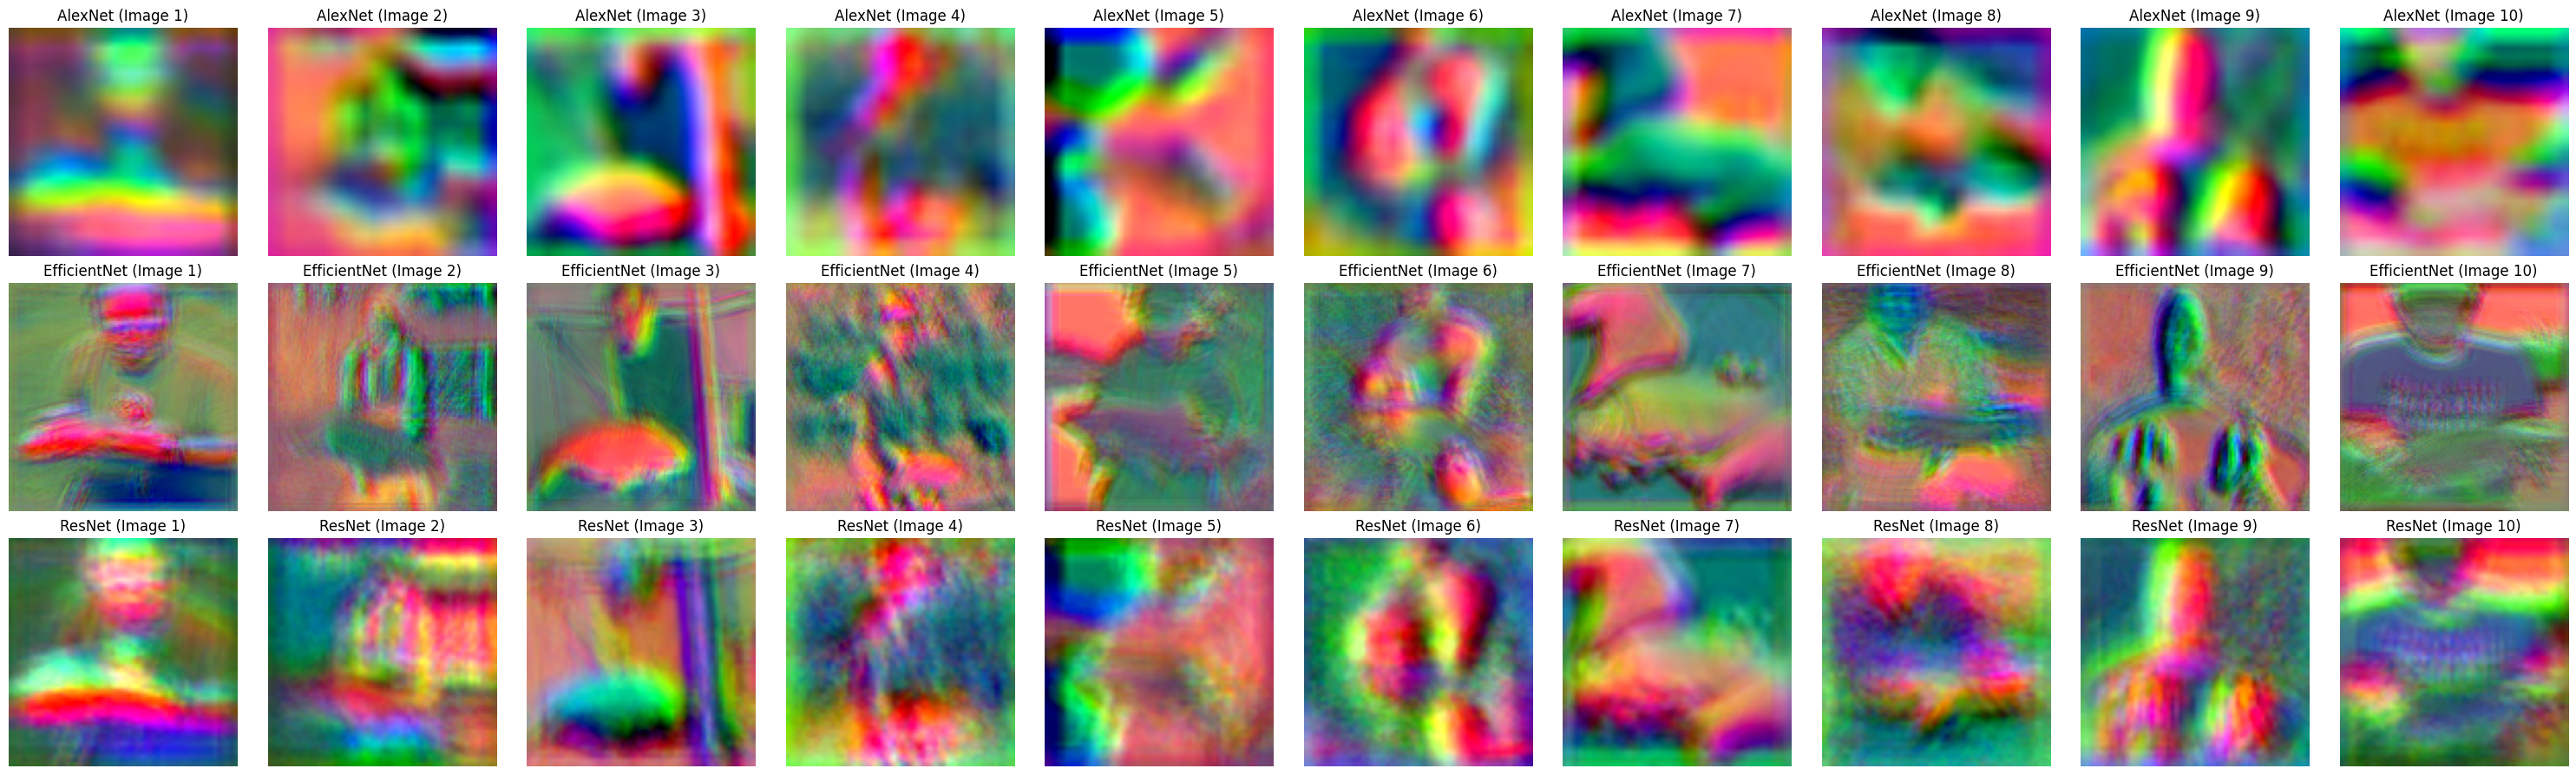

In [9]:
num_images = len(ten_random_images)
fig, axes = plt.subplots(3, num_images, figsize=(num_images * 3, 9))

for i, j in enumerate(ten_random_images):

    image, label = dataset_train[j]
    image = image.unsqueeze(0)

    AlexNet_features = extract_feature_maps(alexnet, image).squeeze(0)
    AlexNet_pca = apply_pca(AlexNet_features)
    AlexNet = resize_feature_map(AlexNet_pca)

    Reconstructed_image = np.transpose(AlexNet, (1, 2, 0))
    Reconstructed_image = Reconstructed_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    Reconstructed_image = np.clip(Reconstructed_image, 0, 1)

    ax = axes[0, i]
    ax.imshow(Reconstructed_image)
    ax.set_title(f"AlexNet (Image {i+1})")
    ax.axis('off')

    EfficientNet_features = extract_feature_maps(efficientnet_b0, image).squeeze(0)
    EfficientNet_pca = apply_pca(EfficientNet_features)
    EfficientNet = resize_feature_map(EfficientNet_pca)

    Reconstructed_image = np.transpose(EfficientNet, (1, 2, 0))
    Reconstructed_image = Reconstructed_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    Reconstructed_image = np.clip(Reconstructed_image, 0, 1)

    ax = axes[1, i]
    ax.imshow(Reconstructed_image)
    ax.set_title(f"EfficientNet (Image {i+1})")
    ax.axis('off')

    ResNet_features = extract_feature_maps(resnet18, image).squeeze(0)
    ResNet_pca = apply_pca(ResNet_features)
    ResNet = resize_feature_map(ResNet_pca)

    Reconstructed_image = np.transpose(ResNet, (1, 2, 0))
    Reconstructed_image = Reconstructed_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    Reconstructed_image = np.clip(Reconstructed_image, 0, 1)

    ax = axes[2, i]
    ax.imshow(Reconstructed_image)
    ax.set_title(f"ResNet (Image {i+1})")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
"""
Similarity:
We observe a very similar pattern across different models for each image,
suggesting that the models are capturing comparable features and structures.

Difference:
However, the patterns are colored differently in each model,
and there is also variation in the level of sharpness or detail,
which indicates that each model interprets and processes the images with distinct characteristics.
"""

# EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50pts)
Also know ans "few-shot/ Zero-shot learning".
Perform KNN classification using the feature vectors from each of the 3 models between the train and test set of Imagenette.


## Visualizing the embedding layer distribution.
* Write an ```extract_embedding(dataloader, model, model_name)``` function that takes in a dataloader and a model and return the ```N x Num_features``` matrix for that set. Make sure that shuffle is off.
* You may write different condition for different models. I.e., the embedding in a ViT model is the ```CLS``` token.

* Plot the t-SNE of the train set for each of the 3 models. Color label the points according to the class labels (see t-SNE implementation by sklearn).

* Write a 2-3 lines disscussion about the data distribution of each model and their comparison.


## Build a KNN ```class``` with the following methods:


*   ```init()```: takes the num_classes and other useful information.
* ```extract_embedding(X, model)```: Extracts the embedding vector for the entire train set using the model. X_features should be ```Nxnum_ft```. Call the function from the previous section.

*   ```fit(X_train, model)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and stores it as ```self.X_train_ft``` and ```self.y_labels``` (the labels from the train set).  


*   ```predict(X_test, model, n_neighbors)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and performs KNN for a given K. Returns the predicted_labels.
* ```compute_accuracy(y_true, y_pred)```.


## Compare the KNN accuracy
using each of the 3 models for $K\in[1,3,5 ]$ and report the results in a table or a graph. Summarize the results in 2-4 lines.


In [113]:
def extract_embedding(X, model, model_name):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    model.eval()

    embeddings = []
    labels = []

    with torch.no_grad():

        for inputs, targets in X:

            inputs, targets = inputs.to(device), targets.to(device)

            if model_name.lower() == 'alexnet':

                features = model.features(inputs)
                features = features.view(features.size(0), -1)
                classifier = model.classifier[0](features)
                classifier = model.classifier[1](classifier)
                classifier = model.classifier[2](classifier)
                classifier = model.classifier[3](classifier)
                classifier = model.classifier[4](classifier)
                embeddings_batch = model.classifier[5](classifier)

            elif model_name.lower() == 'efficientnet':

                features = model.features(inputs)
                classifier = model.avgpool(features)
                embeddings_batch = efficientnet_b0.classifier[0](classifier)
                embeddings_batch = embeddings_batch.view(embeddings_batch.size(0), -1)

            elif model_name.lower() == 'resnet':

                features = model.conv1(inputs)
                features = model.bn1(features)
                features = model.relu(features)
                features = model.maxpool(features)
                features = model.layer1(features)
                features = model.layer2(features)
                features = model.layer3(features)
                features = model.layer4(features)
                embeddings_batch = model.avgpool(features)
                embeddings_batch = embeddings_batch.view(embeddings_batch.size(0), -1)

            embeddings.append(embeddings_batch.cpu().numpy())
            labels.append(targets.cpu().numpy())

    embeddings = np.vstack(embeddings)
    labels = np.hstack(labels)
    return embeddings, labels

In [114]:
from sklearn.manifold import TSNE

def visualize_tsne(embeddings, labels, model_name):

    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))

    for class_id in np.unique(labels):

        idx = labels == class_id
        plt.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], label=f'Class {class_id}')

    plt.title(f't-SNE for {model_name}')
    plt.legend()
    plt.show()

In [115]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset_train, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

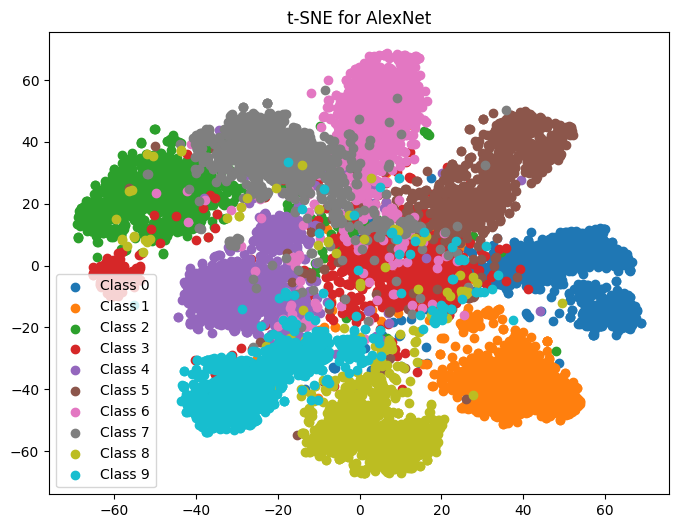

In [72]:
AlexNet_embeddings, AlexNet_labels = extract_embedding(train_loader, alexnet, 'AlexNet')
visualize_tsne(AlexNet_embeddings, AlexNet_labels, 'AlexNet')

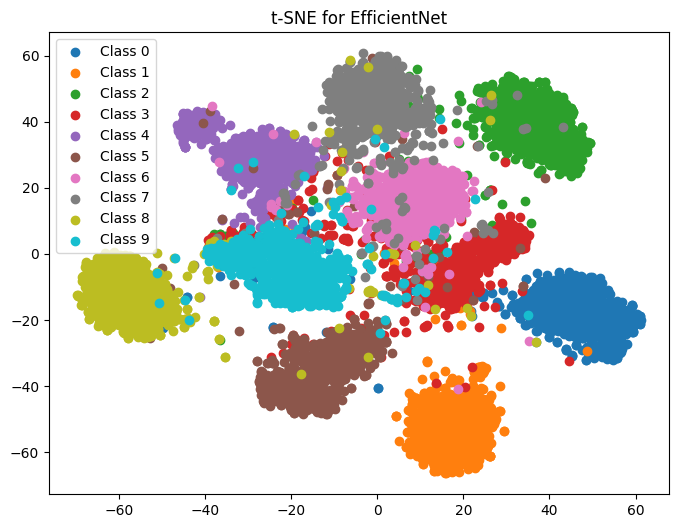

In [116]:
EfficientNet_embeddings, EfficientNet_labels = extract_embedding(train_loader, efficientnet_b0, 'EfficientNet')
visualize_tsne(EfficientNet_embeddings, EfficientNet_labels, 'EfficientNet')

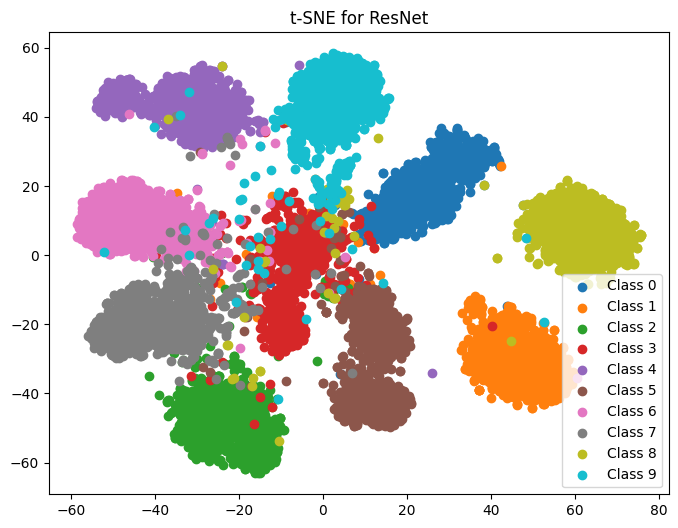

In [93]:
ResNet_embeddings, ResNet_labels = extract_embedding(train_loader, resnet18, 'ResNet')
visualize_tsne(ResNet_embeddings, ResNet_labels, 'ResNet')

In [ ]:
"""
Notably, the embedding distribution in the AlexNet model appears dense and somewhat ambiguous,
lacking the clear separability seen in more advanced architectures.

However, the embedding distribution in the EfficientNet model is significantly better,
with clearly distinguishable and well-separated groups.

Finally, the embedding distribution in the ResNet model shows clear distinctions between the groups,
though it is slightly less pronounced than that of the EfficientNet model
and exhibits a different arrangement compared to the previous models.
"""

In [129]:
from torchvision import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class KNNClassifier:

    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.X_train_ft = None
        self.y_labels = None

    def extract_embedding(self, X, model):

        if isinstance(model, models.AlexNet):
            return extract_embedding(X, model, 'AlexNet')

        elif isinstance(model, models.EfficientNet):
            return extract_embedding(X, model, 'EfficientNet')

        elif isinstance(model, models.ResNet):
            return extract_embedding(X, model, 'ResNet')

    def fit(self, X_train, model):
        self.X_train_ft, self.y_labels = self.extract_embedding(X_train, model)

    def predict(self, X_test, n_neighbors):
        X_test_ft, _ = self.extract_embedding(X_test, model)
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(self.X_train_ft, self.y_labels)
        return knn.predict(X_test_ft)

    def compute_accuracy(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)


In [131]:
models_dict = {
    "AlexNet": alexnet,
    "EfficientNet": efficientnet_b0,
    "ResNet": resnet18,
}

results = []

for model_name, model in models_dict .items():

    knn = KNNClassifier(num_classes=10)
    knn.fit(train_loader, model)

    y_test_true = []
    y_test_pred = {}

    for k in [1, 3, 5]:

        y_pred = knn.predict(test_loader, n_neighbors=k)
        _, y_test = knn.extract_embedding(test_loader, model)
        acc = knn.compute_accuracy(y_test, y_pred)

        results.append((model_name, k, acc))

In [132]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "K", "Accuracy"])
print(results_df)

          Model  K  Accuracy
0       AlexNet  1  0.883057
1       AlexNet  3  0.895032
2       AlexNet  5  0.909299
3  EfficientNet  1  0.979363
4  EfficientNet  3  0.980127
5  EfficientNet  5  0.980382
6        ResNet  1  0.954140
7        ResNet  3  0.958217
8        ResNet  5  0.959236


In [ ]:
"""
In the embeddings distribution of the different models,
we observe corresponding levels of accuracy.
Specifically, for a dense and ambiguous distribution,
we achieved relatively low clustering accuracy across all three values of k.
Conversely, for a more distinct and well-separated distribution,
we obtained higher accuracy for all three values of k,
highlighting the impact of clear group separation on clustering performance.
"""